# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904398330
verification code:  1df8ee56d061
⚠️  Include those two lines at the top of your notebook submission!
======================================================================
```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()
#sales.info()

Sales: 2617 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1001,2025-11-10 06:00:00,Campus,105,1.0,3.40,Mobile,False
1,1000,2025-11-10 06:10:00,Campus,102,2.0,8.03,Credit,True
2,1002,2025-11-10 06:22:00,Campus,111,1.0,3.07,Cash,False
3,1003,2025-11-10 06:58:00,Campus,102,1.0,4.35,Credit,False
4,1009,2025-11-10 07:01:00,Downtown,101,1.0,3.31,Credit,False


In [220]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [134]:
# Task 1: use isna(), nunique(), min/max on timestamp
missing_num_sales = sales.isna().sum()
print(f"Below are the amount of missing values in each column: \n{missing_num_sales}\n")

unique_product_IDs = sales['product_id'].nunique()
product_IDs_count = sales['product_id'].count()
print(f"There are {unique_product_IDs} unique product IDs out of {product_IDs_count} product IDs in the sales data\n") 

date_range = sales['timestamp']
earliest_transaction = date_range.min()
latest_transaction = date_range.max()
print(f"Earliest transaction date: {earliest_transaction} \n") 
print(f"Latest transaction date: {latest_transaction} \n") 


Below are the amount of missing values in each column: 
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          7
revenue           5
payment_method    0
loyalty_member    0
dtype: int64

There are 21 unique product IDs out of 2617 product IDs in the sales data

Earliest transaction date: 2025-11-10 06:00:00 

Latest transaction date: 2025-11-23 21:18:00 



## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [213]:
# Task 2: use pd.merge() with appropriate join type
sales_and_products = pd.merge(sales, products, on='product_id', how='left')   
sales_and_products

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1001,2025-11-10 06:00:00,Campus,105,1.0,3.40,Mobile,False,Cold Brew,Coffee,1.5
1,1000,2025-11-10 06:10:00,Campus,102,2.0,8.03,Credit,True,Cappuccino,Coffee,1.8
2,1002,2025-11-10 06:22:00,Campus,111,1.0,3.07,Cash,False,Croissant,Pastry,1.0
3,1003,2025-11-10 06:58:00,Campus,102,1.0,4.35,Credit,False,Cappuccino,Coffee,1.8
4,1009,2025-11-10 07:01:00,Downtown,101,1.0,3.31,Credit,False,Espresso,Coffee,1.2
...,...,...,...,...,...,...,...,...,...,...,...
2612,3610,2025-11-23 19:25:00,Suburb,113,1.0,4.00,Credit,False,Scone,Pastry,1.1
2613,3611,2025-11-23 19:41:00,Suburb,111,1.0,3.48,Cash,True,Croissant,Pastry,1.0
2614,3612,2025-11-23 20:10:00,Suburb,108,1.0,2.60,Credit,True,Chai Latte,Tea,1.2
2615,3613,2025-11-23 20:53:00,Suburb,110,1.0,8.17,Cash,True,Premium Matcha,Tea,2.2


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [212]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs
#sales_and_products_shape = 
print(f"Shape of the merged sales and products DataFrame: {sales_and_products.shape} versus Shape of the original sales Dataframe: {sales.shape}\n")
#print(sales.shape)

mv_pc_ncc = sales_and_products.loc[:, ['name', 'category', 'cost', 'product_id']].isna().sum()
# mv_pc_ncc stands for => 'missing' 'values' in the 'product' 'columns' ('name', 'category', 'cost')
print(f"{mv_pc_ncc.iloc[0]} rows have missing values in the 'name', 'category', and 'cost' columns as shown below: \n{mv_pc_ncc}\n")  

ncc_mv_booleanMask = sales_and_products[['name', 'category', 'cost']].isna().any(axis=1) 
problem_product_ids = sales_and_products[ncc_mv_booleanMask]['product_id'].to_frame(name='Problem product_ids')
#print(ncc_mv_booleanMask)
print(f"Displayed below are the product_id(s) that are causing the problem: ")
#print(problem_product_ids)
problem_product_ids


Shape of the merged sales and products DataFrame: (2617, 11) versus Shape of the original sales Dataframe: (2617, 8)

15 rows have missing values in the 'name', 'category', and 'cost' columns as shown below: 
name          15
category      15
cost          15
product_id     0
dtype: int64

Displayed below are the product_id(s) that are causing the problem: 


,Problem product_ids
24,199
34,200
76,201
549,201
829,200
922,199
1001,200
1444,199
1806,201
2002,199


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [219]:
# Task 4: create profit column, then groupby with .agg()
sales_and_products['profit'] = sales_and_products['revenue'] - (sales_and_products['cost'] * sales_and_products['quantity'])
print(sales_and_products['profit'])  
#category_profit = sales_and_products.groupby('category')[['quantity','profit']].sum().sort_values(by=['profit'],ascending=False)
category_profit = (sales_and_products
    .groupby('category')
    .agg({          
    'profit': 'sum',
    'quantity': 'sum'
    })
    .sort_values(by=['profit'],ascending=False)
                  )
#print(f"\n{category_profit}") 
category_profit 


0       1.90
1       4.43
2       2.07
3       2.55
4       2.11
        ... 
2612    2.90
2613    2.48
2614    1.40
2615    5.97
2616    1.51
Name: profit, Length: 2617, dtype: float64


,profit,quantity
category,,
Sandwich,4343.96,642.0
Coffee,2226.43,988.0
Pastry,1555.29,561.0
Tea,796.99,547.0


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [216]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()
sales_and_products['Total profit'] = sales_and_products['revenue'] - (sales_and_products['cost'] * sales_and_products['quantity'])  
sales_and_products['Average profit per transaction'] = sales_and_products['revenue'] - (sales_and_products['cost'] * sales_and_products['quantity'])  
sales_and_products['Number of Transactions'] = sales_and_products['transaction_id'].count()
# avg_ppt => Average profit per transaction  
categoryAndlocation = (sales_and_products  
    .groupby(['category','location'])
    .agg({          
    'Total profit': 'sum',
    'Average profit per transaction': 'mean',
    'Number of Transactions': 'count'
    })
    .reset_index() 
                      )
#sales_and_products['location']
categoryAndlocation
#sales_and_products

,category,location,Total profit,Average profit per transaction,Number of Transactions
0,Coffee,Campus,1073.05,2.043905,527
1,Coffee,Downtown,979.08,3.059625,323
2,Coffee,Suburb,174.30,2.293421,76
3,Pastry,Campus,592.60,2.469167,241
4,Pastry,Downtown,602.83,3.484566,174
5,Pastry,Suburb,359.86,2.949672,123
6,Sandwich,Campus,761.97,5.521522,139
7,Sandwich,Downtown,2673.89,7.864382,342
8,Sandwich,Suburb,908.10,6.677206,136
9,Tea,Campus,166.41,1.197194,139


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

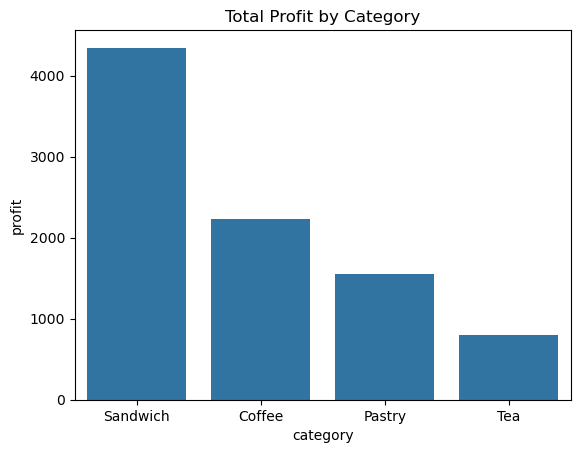

In [218]:
# Task 6: use sns.barplot() with aggregated data
Total_profit = sns.barplot(data=category_profit, x='category', y='profit')
#plt.title('Total Profit by Category')
Total_profit.set_title('Total Profit by Category')
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

1. If the merge was not verified by category before the analysis, the values from the `category` or `cost` column could have been missing from the dataset. This mishap could have caused missing data when:  
    - Calculating the *profit* due to the possible absence of the values in the `cost` column
    - Displaying the profitability of *product* by *category* since *categorical* data could also be missing
    - Displaying how *profitability* varies by both *category* and *location*
          - *categorical* and *profit* data could be missing as already mentioned
2. Before aggregating data at these levels, I could only see the profit of individual transactions. After Aggregating the data I was able to learn:
    - The total **profit** earned by each *category*
    - The total *quantity* sold in each *category*
    - The total **profit** earned by each *category* at each *location*
    - The average **profit** per location earned by each *category* at each *location*
3. - It was neat learning how the combination of `.groupby()` and `.agg()` displayed `profit` and `quantity` from each `category`
   - It was even more impressive learning how the simple combination of `.groupby()` with **multiple** columns *and* `.agg()` with a `dict` separated the Total profit, Average profit per transaction, and Number of transactions for each combination of `category` and `location`
4. - As shown in the table below from Task 5, the *Total profit* from Tea at each `location` is much less profitable than most of the other *category* and *location* combinations. 
        - For example: On campus, the total profit of tea is `$166.41` versus coffee which is `$1073.05`
        - To improve profitability, the owner can experiment with removing Tea from the menu and use the money from the inventory cost of Tea to  prurchase more inventory for sandwiches, pastries and coffee.
            - This is sad for me because I love chai lattes! 
        - To expound on this from a more detailed point of view, depending on which type of sandwich and pastry is more popular according each of their profit margins, the owner could specifically purchase ingredients for the more popular sandwich and pastry.
        - Additionally, the owner could expand the sandwich, pastry, and coffee options, with the extra inventory money, by having seasonal coffee and pastry, and/or once a month speciality sandwich and coffee options.   

In [223]:
categoryAndlocation = (sales_and_products  
    .groupby(['category','location'])
    .agg({          
    'Total profit': 'sum',
    'Average profit per transaction': 'mean',
    'Number of Transactions': 'count'
    })
    .reset_index() 
                      )
#sales_and_products['location']
categoryAndlocation

,category,location,Total profit,Average profit per transaction,Number of Transactions
0,Coffee,Campus,1073.05,2.043905,527
1,Coffee,Downtown,979.08,3.059625,323
2,Coffee,Suburb,174.30,2.293421,76
3,Pastry,Campus,592.60,2.469167,241
4,Pastry,Downtown,602.83,3.484566,174
5,Pastry,Suburb,359.86,2.949672,123
6,Sandwich,Campus,761.97,5.521522,139
7,Sandwich,Downtown,2673.89,7.864382,342
8,Sandwich,Suburb,908.10,6.677206,136
9,Tea,Campus,166.41,1.197194,139


## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [ ]:
# Bonus: Your time-based analysis here


### Your Findings

*Bonus findings here (state your question and what you discovered)*

## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.